In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

c:\Users\tomek\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Unique Finding Labels

In [2]:
df = pd.read_csv('Data_Entry_2017.csv')
# In some cases there are more findings than one, which are separated with '|' symbol
unique_finding_labels = df['Finding Labels'].str.split('|').explode().unique()
print(unique_finding_labels)

['Cardiomegaly' 'Emphysema' 'Effusion' 'No Finding' 'Hernia'
 'Infiltration' 'Mass' 'Nodule' 'Atelectasis' 'Pneumothorax'
 'Pleural_Thickening' 'Pneumonia' 'Fibrosis' 'Edema' 'Consolidation']


### Counts of each Finding Label

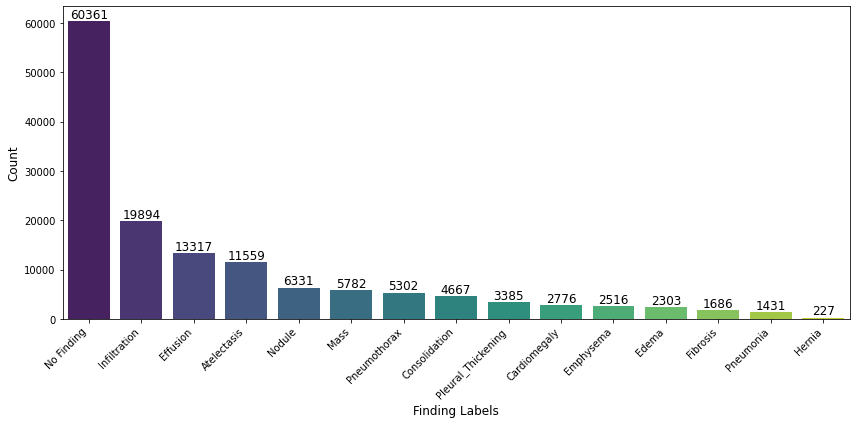

In [3]:
finding_labels_counts = df['Finding Labels'].str.split('|').explode().value_counts()

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=finding_labels_counts.index, y=finding_labels_counts.values, palette='viridis')

plt.xlabel('Finding Labels', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')

for i, value in enumerate(finding_labels_counts.values):
    ax.text(i, value + 0.2, str(value), ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.savefig('SavedPlots\\FindingLabelNotFiltered.pdf', format='pdf')
plt.show()

### Counts of each Finding Label, but the multiple findings are excluded

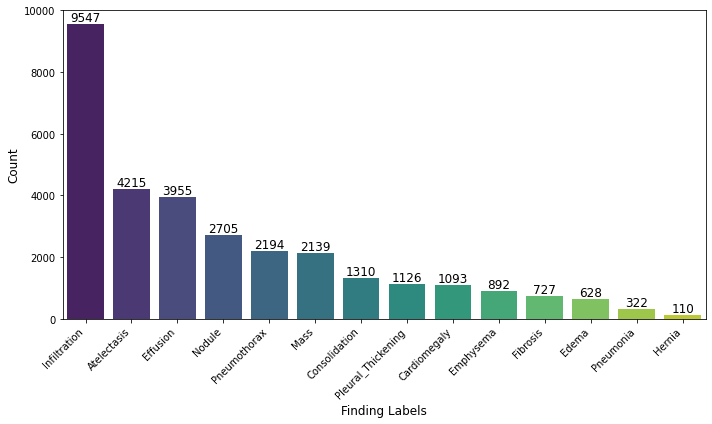

In [4]:
# Filter out rows where Finding Labels contains multiple labels (contains '|')
df_single_label = df[~df['Finding Labels'].str.contains('|', regex=False)]
findf = df_single_label[~df_single_label["Finding Labels"].str.contains('No Finding', regex=False)]

finding_labels_counts_single = findf['Finding Labels'].value_counts()


plt.figure(figsize=(10, 6))
ax = sns.barplot(x=finding_labels_counts_single.index, y=finding_labels_counts_single.values, palette='viridis')

plt.xlabel('Finding Labels', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')

for i, value in enumerate(finding_labels_counts_single.values):
    ax.text(i, value + 0.2, str(value), ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.savefig('SavedPlots\\FindingLabelFiltered.pdf', format='pdf') 
plt.show()

### ACGAN training images

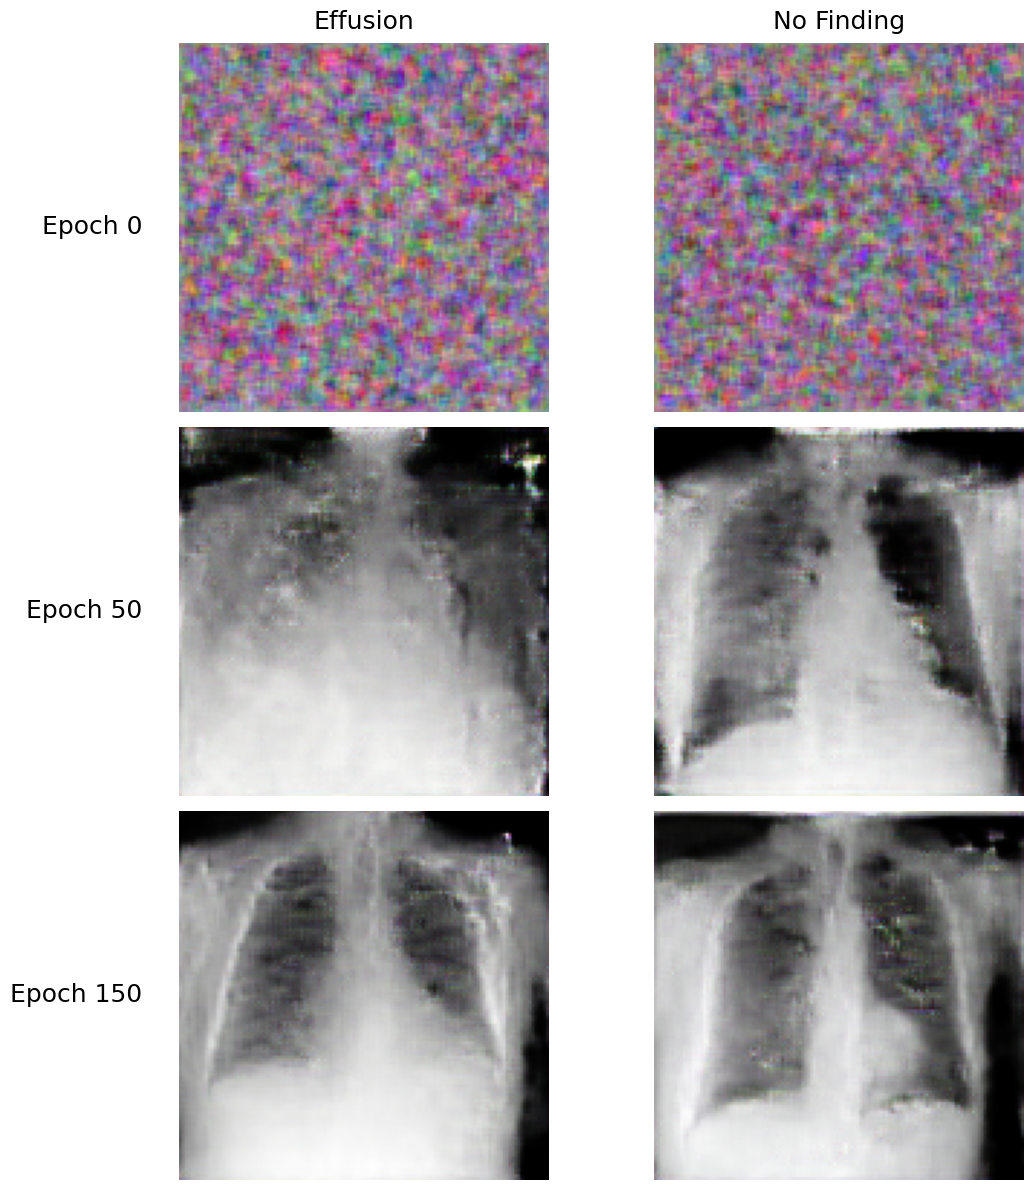

In [3]:
with open('..\\DataConfig\\PlotAcganTraining.py') as f:
    exec(f.read())

### Images with bounding boxes

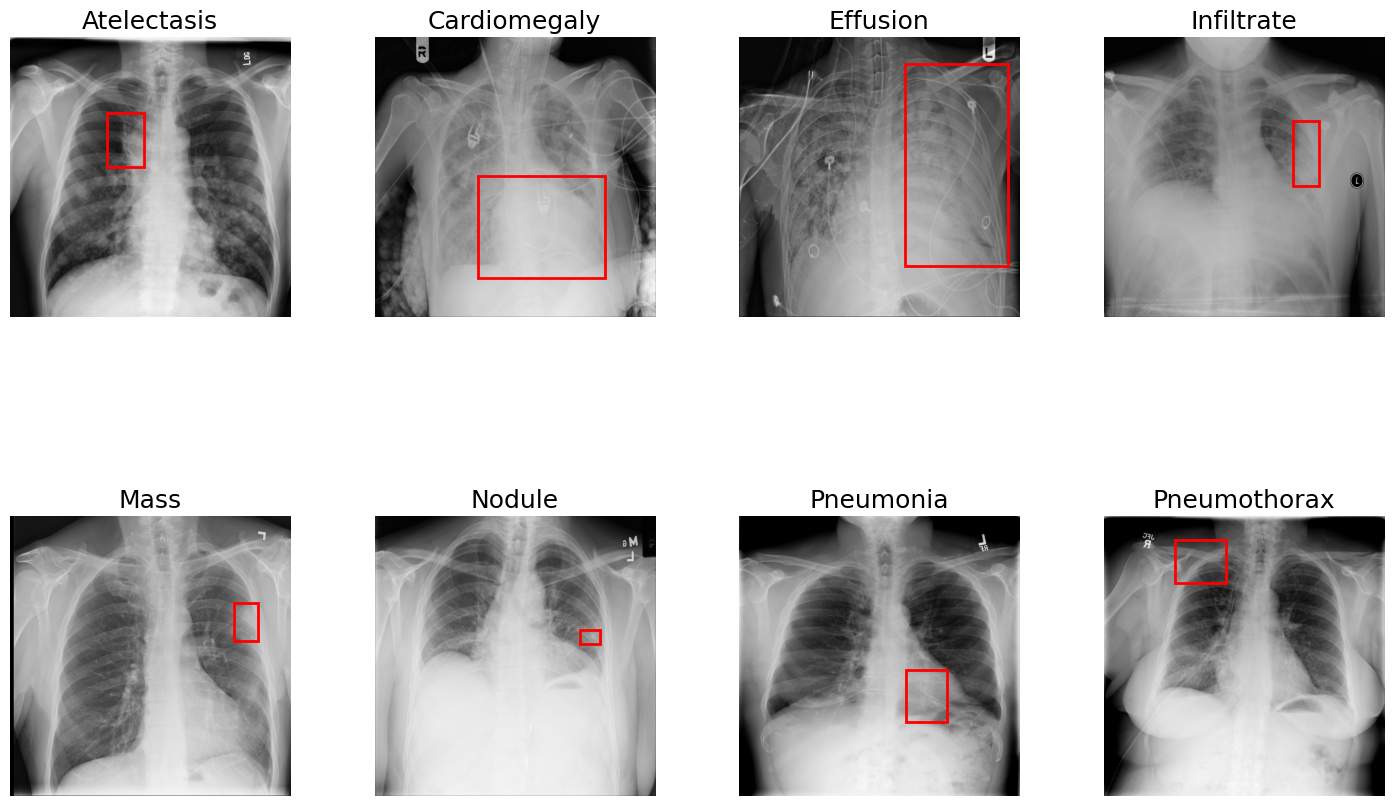

In [7]:
with open('..\\DataConfig\\CreateBoundingBox.py') as f:
    exec(f.read())